In [44]:
from main_6_4 import *
import pandas as pd
linewidth = 2
xlim = [0,60]
xlabel = 't [h]'
titlefont = 20
labelfont = 15
legendfont = 15
tickfont = 12

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

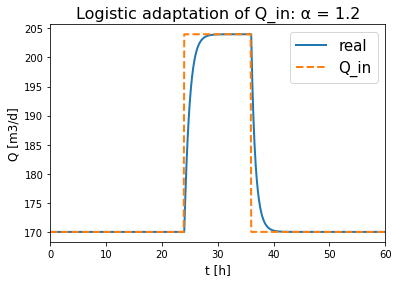

In [47]:
Q_in_real = np.ones(len(Q_in))*Q_in[0]
loc_index = 0
pippo = 0
k_logi = 1.2
for i in range(len(Q_in)):
    t=t_span[i]    
    if t < T3.index.values[0]*24:
        Q_in_real[i] = Q_in[i]
    elif t >= T3.index.values[-1]*24:
        Q_in_0_loc = Q_in_real[t_span<T3.index.values[-1]*24][-1]
        Q_in_real[i] = logistic_deviations(t, T3.Qin.iloc[-1]*Q_in[0], k_logi, T3.index.values[-1]*24, Q_in_0_loc)
    else:
        Q_in_0_loc = Q_in_real[t_span<T3.index.values[loc_index]*24][-1]
        Q_in_real[i] = logistic_deviations(t, T3.Qin.iloc[loc_index]*Q_in[0], k_logi, T3.index.values[loc_index]*24, Q_in_0_loc)
        if t >= T3.index.values[loc_index+1]*24:
            loc_index += 1
    
plt.plot(t_span,Q_in_real, label='real', linewidth=2)
plt.plot(t_span,Q_in, '--', label = 'Q_in', linewidth=2)
plt.legend(fontsize=legendfont)
plt.title('Logistic adaptation of Q_in: \u03B1 = {}'.format(k_logi), fontsize=titlefont-4)
plt.xlim([0,60])
plt.ylabel('Q [m3/d]', fontsize=labelfont-3)
plt.xlabel('t [h]', fontsize=labelfont-3)
plt.xticks(fontsize=tickfont-2)


In [5]:
level_t

<function functions.level_t(t, D, Qin, SR, h0, t_change)>

(array([10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 ,
        12.75, 13.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

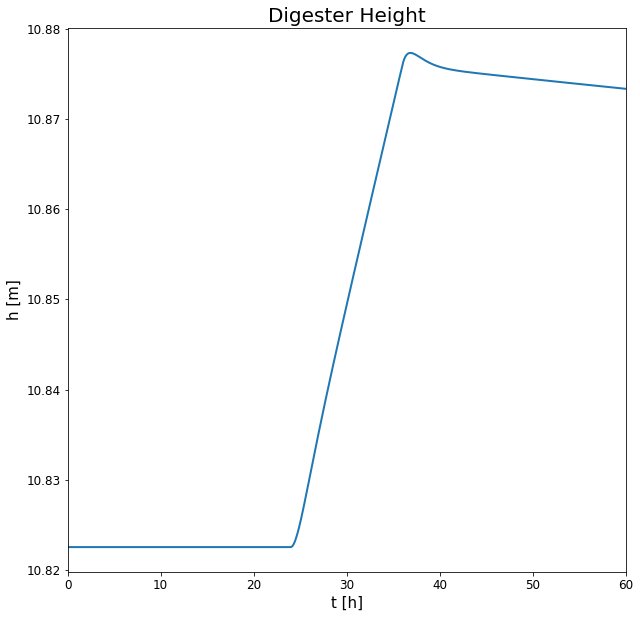

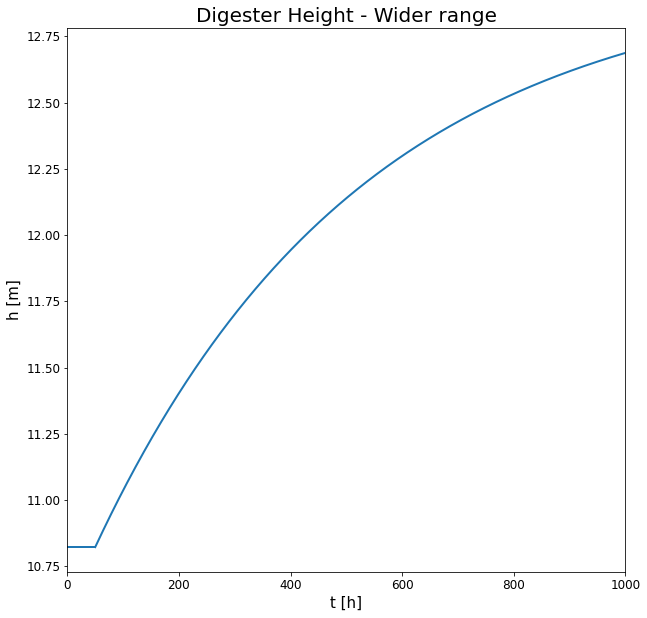

In [49]:
plt.figure(figsize=(10,10))

plt.title('Digester Height', fontsize=titlefont)
plt.plot(t_span, h, linewidth=2)
plt.xlim([0,60])
plt.ylabel('h [m]', fontsize=labelfont) 
plt.xlabel('t [h]', fontsize=labelfont)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.figure(figsize=(10,10))
tvett = np.linspace(50,1000,1000)
plt.title('Digester Height - Wider range', fontsize=titlefont)
plt.plot(np.linspace(0,50,50), h[:50], color = 'tab:blue',linewidth=2)
plt.plot(tvett, level_t(tvett, D, 1.2*170, SR, h_SS, 50),  color = 'tab:blue',linewidth=2)
plt.xlim([0,1000])
plt.ylabel('h [m]', fontsize=labelfont) 
plt.xlabel('t [h]', fontsize=labelfont)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

Text(0.5, 0, 't [h]')

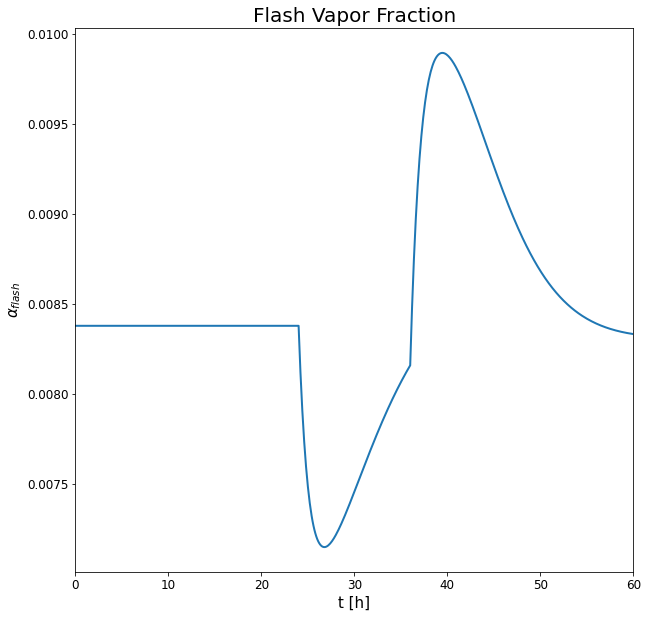

In [98]:
plt.figure(figsize=(10,10))
plt.plot(t_span, alpha_flash, linewidth=linewidth)
plt.title('Flash Vapor Fraction', fontsize=titlefont)
plt.xlim(xlim)
plt.ylabel(r'$\alpha_{flash}$', fontsize=labelfont)
plt.tick_params(axis='both', which='major', labelsize=tickfont)
plt.xlabel(xlabel, fontsize=labelfont)


Text(0.5, 0, 't [h]')

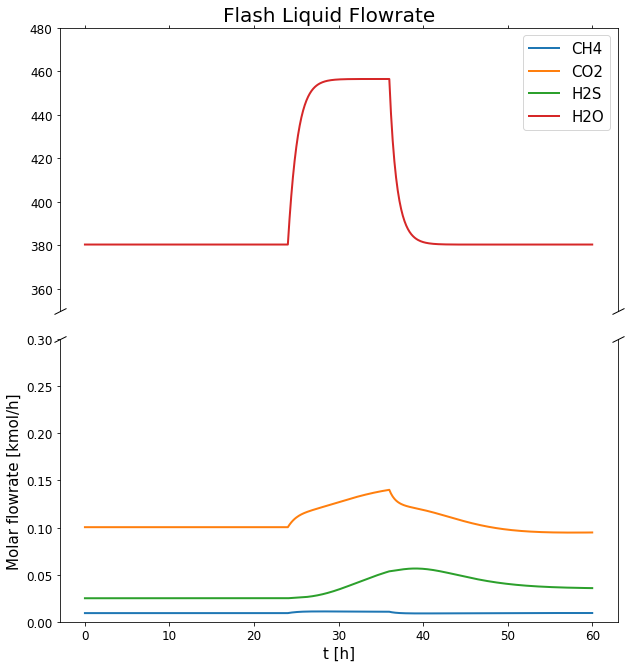

In [117]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(10,10)
plt.suptitle('Flash Liquid Flowrate', fontsize=titlefont)
fig.subplots_adjust(hspace=0.1, top=0.95)

ax1.plot(t_span, N_L/1000, linewidth=linewidth)
ax2.plot(t_span, N_L/1000, linewidth=linewidth)
ax1.set_ylim(3.5e+2, 4.8e+2)
ax2.set_ylim(0, 0.3)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.legend(species, fontsize=legendfont)
ax1.tick_params(labelsize=tickfont)
ax2.tick_params(labelsize=tickfont)
plt.ylabel('Molar flowrate [kmol/h]', fontsize=labelfont)
plt.xlabel('t [h]', fontsize=labelfont)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

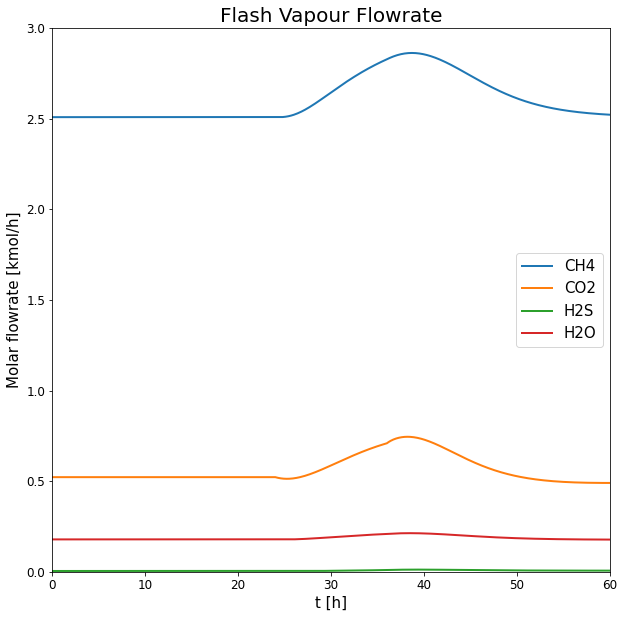

In [121]:
plt.figure(figsize=(10,10))
plt.plot(t_span, N_V/1000, linewidth=2)
plt.xlim([0,60])
plt.ylabel('Molar flowrate [kmol/h]', fontsize=labelfont)
plt.xlabel('t [h]'.format(t), fontsize=labelfont)
plt.title('Flash Vapour Flowrate', fontsize=titlefont)
plt.ylim([0, 3])
species = ['CH4', 'CO2', 'H2S', 'H2O']
plt.legend(species, fontsize=legendfont)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

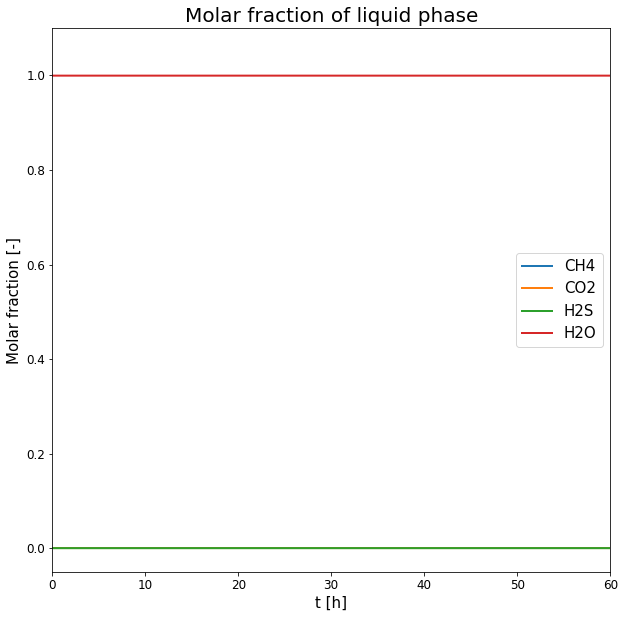

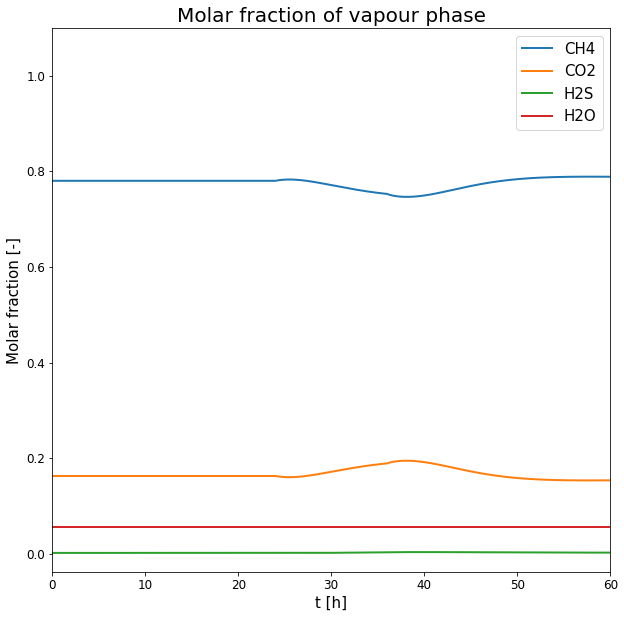

In [50]:
plt.figure(figsize=(10,10))
plt.plot(t_span, x_i, linewidth=2)
plt.xlim([0,60])
plt.ylabel('Molar fraction [-]', fontsize=labelfont)
plt.xlabel('t [h]'.format(t), fontsize=labelfont)
plt.title('Molar fraction of liquid phase', fontsize=titlefont)
plt.ylim(top=1.1)
species = ['CH4', 'CO2', 'H2S', 'H2O']
plt.legend(species, fontsize=legendfont)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)

plt.figure(figsize=(10,10))
plt.plot(t_span, y_i, linewidth = 2)
plt.xlim([0,60])
plt.ylabel('Molar fraction [-]', fontsize=labelfont)
plt.xlabel('t [h]', fontsize=labelfont)
plt.ylim(top=1.1)
plt.title('Molar fraction of vapour phase', fontsize=titlefont)
plt.legend(species, fontsize=legendfont)
plt.xticks(fontsize=tickfont)
plt.yticks(fontsize=tickfont)